In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from utils_preprocessing import *

# Exploratory Sentiment Analysis
We will run a baseline sentiment analysis with TextBlob implementation on our dataset i.e aggregated quotes based on mentions of 2012, 2016, 2020 U.S elections candidates. The goal of this preliminary analysis is :
* Explore the distribution of positive/negative quotes mentioning political candidates
* Have an idea of correctness of the baseline implementation

In [31]:
# load data
df_obama_2012 = pd.read_csv("Data/2012/obama_2012.zip", compression="zip")
df_romney_2012 = pd.read_csv("Data/2012/romney_2012.zip", compression="zip")
df_trump_2016 = pd.read_csv("Data/2016/trump_2016.zip", compression="zip")
df_clinton_2016 = pd.read_csv("Data/2016/clinton_2016.zip", compression="zip")
df_trump_2020 = pd.read_csv("Data/2020/trump_2020.zip", compression="zip")
df_biden_2020 = pd.read_csv("Data/2020/biden_2020.zip", compression="zip")

## Text preprocessing
Our baseline text preprocessing consists of :
* Make text lowercase
* Remove punctuation
* Remove stopwords
* Lemmatization

Before applying sentiment analysis.

In [32]:
# preprocess data for sentiment analysis
tags = ['quotation_lemmatized', 'quotation_stemmed', 'quotation_tokenized', 'quotation_conc_lemmatized']
df_trump_2016 = preprocess_data_for_sentiment_analysis(df_trump_2016, tags=tags)
df_trump_2020 = preprocess_data_for_sentiment_analysis(df_trump_2020, tags=tags)
df_clinton_2016 = preprocess_data_for_sentiment_analysis(df_clinton_2016, tags=tags)
df_biden_2020 = preprocess_data_for_sentiment_analysis(df_biden_2020, tags=tags)

df_trump_2016.head()

[process_sa] Prepared for sentiment analysis with tags: ['quotation_lemmatized', 'quotation_stemmed', 'quotation_tokenized', 'quotation_conc_lemmatized']
[process_sa] Prepared for sentiment analysis with tags: ['quotation_lemmatized', 'quotation_stemmed', 'quotation_tokenized', 'quotation_conc_lemmatized']
[process_sa] Prepared for sentiment analysis with tags: ['quotation_lemmatized', 'quotation_stemmed', 'quotation_tokenized', 'quotation_conc_lemmatized']
[process_sa] Prepared for sentiment analysis with tags: ['quotation_lemmatized', 'quotation_stemmed', 'quotation_tokenized', 'quotation_conc_lemmatized']
[process_sa] Prepared for sentiment analysis with tags: ['quotation_lemmatized', 'quotation_stemmed', 'quotation_tokenized', 'quotation_conc_lemmatized']
[process_sa] Prepared for sentiment analysis with tags: ['quotation_lemmatized', 'quotation_stemmed', 'quotation_tokenized', 'quotation_conc_lemmatized']


,Unnamed: 0,Unnamed: 0.1,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,month,type,candidate,quotation_tokenized,quotation_stemmed,quotation_lemmatized,quotation_conc_lemmatized
0,3,1709,2016-07-07-033290,I didn't want to delete it -- I would have nev...,Donald J. Trump,['Q22686'],2016-07-07 01:49:02,4,"[['Donald J. Trump', '0.7791'], ['None', '0.21...",['http://mobile.nytimes.com/2016/07/07/us/poli...,E,Jul,NY Times,Donald Trump,"[i, did not, want, to, delete, it, i, would, h...","[did not, want, delet, would, never, delet, pe...","[did not, want, delete, would, never, deleted,...",did not want delete would never deleted people...
1,9,6715,2016-07-25-126140,"Wow, the Republican Convention went so smoothl...",Donald Trump,"['Q22686', 'Q27947481']",2016-07-25 00:00:00,171,"[['Donald Trump', '0.8662'], ['None', '0.1103'...",['http://dailyherald.com/article/20160725/news...,E,Jul,NY Times,Donald Trump,"[wow, the, , convention, went, so, smoothly, c...","[wow, , convent, went, smoothli, compar, dem, ...","[wow, , convention, went, smoothly, compared, ...",wow convention went smoothly compared dems to...
2,11,7112,2016-08-09-004561,"Although, the Second Amendment people -- maybe...",Donald Trump,"['Q22686', 'Q27947481']",2016-08-09 00:00:00,1183,"[['Donald Trump', '0.6569'], ['None', '0.2428'...",['http://onenewspage.com/video/20160809/525505...,E,Aug,NY Times,Donald Trump,"[although, the, second, amendment, people, , t...","[although, second, amend, peopl, , , do not, k...","[although, second, amendment, people, , , do n...",although second amendment people do not know
3,15,11168,2016-09-07-092168,She's totally unfit to be our commander in chief.,Donald J. Trump,['Q22686'],2016-09-07 16:38:49,2,"[['Donald J. Trump', '0.4223'], ['Donald Trump...",['http://www.nytimes.com/2016/09/08/us/politic...,E,Sep,NY Times,Donald Trump,"[she is, totally, unfit, to, , our, commander,...","[she i, total, unfit, , command, chief]","[she is, totally, unfit, , commander, chief]",she is totally unfit commander chief
4,16,13945,2016-09-07-003185,A Trump supporter is fighting against just abo...,Brad Pitt,"['Q35332', 'Q373912']",2016-09-07 10:34:00,16,"[['Brad Pitt', '0.3934'], ['None', '0.349'], [...",['http://eonline.com/news/792842/brad-pitt-wei...,E,Sep,NY Times,Donald Trump,"[a, trump, supporter, , fighting, against, jus...","[trump, support, , fight, , everyth]","[trump, supporter, , fighting, , everything]",trump supporter fighting everything


## Sentiment Analysis
Our baseline sentiment analysis consists of using TextBlob's sentiment analysis implementation which makes us of NLTK and pattern. The sentiment property is a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective. We separate the tuple and append two columns with the retrieved values.

In [33]:
df_obama_2012_sa = expand_quotations_with_polarity_subjectivity(df_obama_2012, column='quotation_conc_lemmatized')
df_romney_2012_sa = expand_quotations_with_polarity_subjectivity(df_romney_2012, column='quotation_conc_lemmatized')

df_trump_2016_sa = expand_quotations_with_polarity_subjectivity(df_trump_2016, column='quotation_conc_lemmatized')
df_clinton_2016_sa = expand_quotations_with_polarity_subjectivity(df_clinton_2016, column='quotation_conc_lemmatized')

df_trump_2020_sa = expand_quotations_with_polarity_subjectivity(df_trump_2020, column='quotation_conc_lemmatized')
df_biden_2020_sa = expand_quotations_with_polarity_subjectivity(df_biden_2020, column='quotation_conc_lemmatized')

df_trump_2016_sa.head()

,Unnamed: 0,Unnamed: 0.1,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,month,type,candidate,quotation_tokenized,quotation_stemmed,quotation_lemmatized,quotation_conc_lemmatized,quotation_polarity,quotation_subjectivity
0,3,1709,2016-07-07-033290,I didn't want to delete it -- I would have nev...,Donald J. Trump,['Q22686'],2016-07-07 01:49:02,4,"[['Donald J. Trump', '0.7791'], ['None', '0.21...",['http://mobile.nytimes.com/2016/07/07/us/poli...,E,Jul,NY Times,Donald Trump,"[i, did not, want, to, delete, it, i, would, h...","[did not, want, delet, would, never, delet, pe...","[did not, want, delete, would, never, deleted,...",did not want delete would never deleted people...,0.000000,0.0000
1,9,6715,2016-07-25-126140,"Wow, the Republican Convention went so smoothl...",Donald Trump,"['Q22686', 'Q27947481']",2016-07-25 00:00:00,171,"[['Donald Trump', '0.8662'], ['None', '0.1103'...",['http://dailyherald.com/article/20160725/news...,E,Jul,NY Times,Donald Trump,"[wow, the, , convention, went, so, smoothly, c...","[wow, , convent, went, smoothli, compar, dem, ...","[wow, , convention, went, smoothly, compared, ...",wow convention went smoothly compared dems to...,0.120833,0.5875
2,11,7112,2016-08-09-004561,"Although, the Second Amendment people -- maybe...",Donald Trump,"['Q22686', 'Q27947481']",2016-08-09 00:00:00,1183,"[['Donald Trump', '0.6569'], ['None', '0.2428'...",['http://onenewspage.com/video/20160809/525505...,E,Aug,NY Times,Donald Trump,"[although, the, second, amendment, people, , t...","[although, second, amend, peopl, , , do not, k...","[although, second, amendment, people, , , do n...",although second amendment people do not know,0.000000,0.0000
3,15,11168,2016-09-07-092168,She's totally unfit to be our commander in chief.,Donald J. Trump,['Q22686'],2016-09-07 16:38:49,2,"[['Donald J. Trump', '0.4223'], ['Donald Trump...",['http://www.nytimes.com/2016/09/08/us/politic...,E,Sep,NY Times,Donald Trump,"[she is, totally, unfit, to, , our, commander,...","[she i, total, unfit, , command, chief]","[she is, totally, unfit, , commander, chief]",she is totally unfit commander chief,0.000000,0.7500
4,16,13945,2016-09-07-003185,A Trump supporter is fighting against just abo...,Brad Pitt,"['Q35332', 'Q373912']",2016-09-07 10:34:00,16,"[['Brad Pitt', '0.3934'], ['None', '0.349'], [...",['http://eonline.com/news/792842/brad-pitt-wei...,E,Sep,NY Times,Donald Trump,"[a, trump, supporter, , fighting, against, jus...","[trump, support, , fight, , everyth]","[trump, supporter, , fighting, , everything]",trump supporter fighting everything,0.000000,0.0000


## Plot the frequency distributions of polarity and subjectivity

Let's look at the frequency distribution of the polarity and subjectivity computed from the quotes.

Text(0.5, 1.0, "Subjectivity distribution - 2020 - 'Biden' - over 2733 quotes")

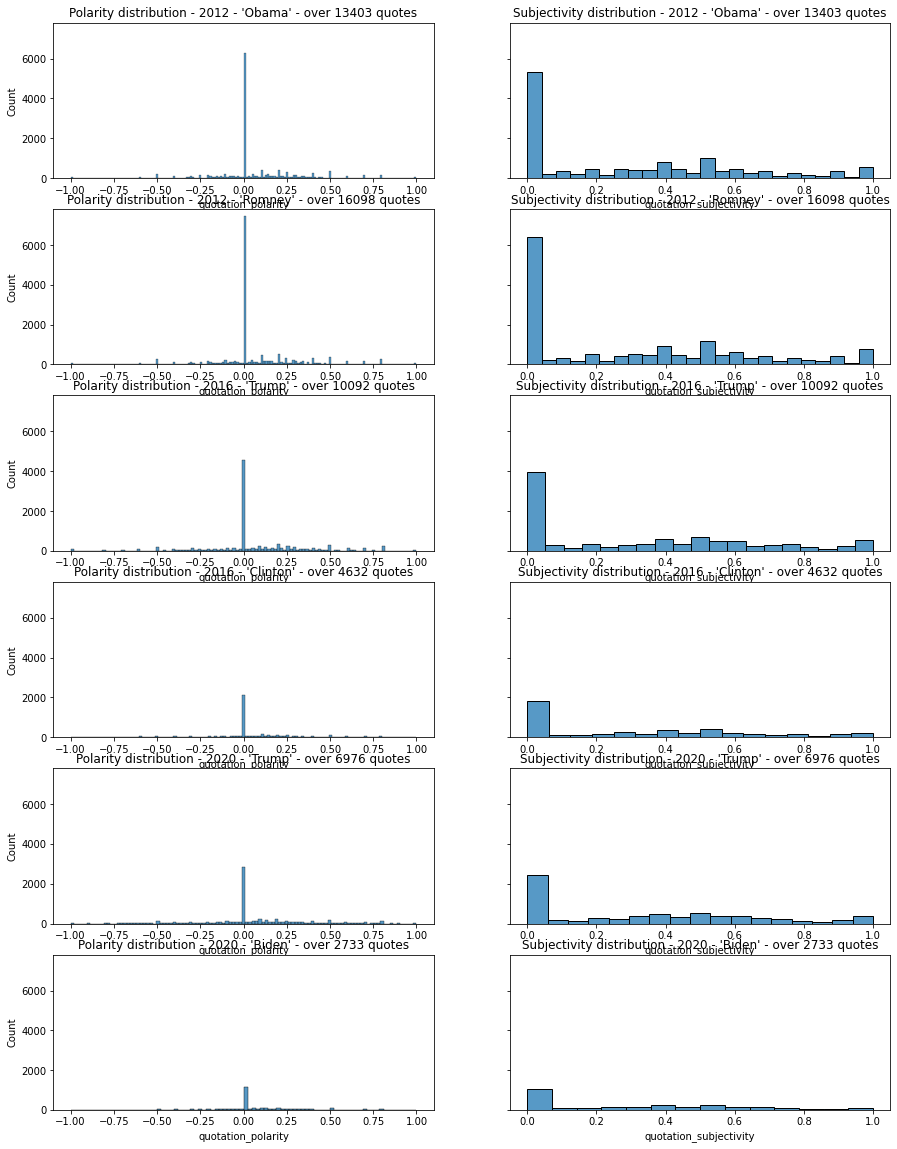

In [34]:
fig, axes = plt.subplots(6, 2, figsize=(15, 20), sharey=True)

sns.histplot(df_obama_2012_sa['quotation_polarity'], ax=axes[0][0])
axes[0][0].set_title(f'Polarity distribution - 2012 - \'Obama\' - over {len(df_obama_2012_sa)} quotes')
sns.histplot(df_obama_2012_sa['quotation_subjectivity'], ax=axes[0][1])
axes[0][1].set_title(f'Subjectivity distribution - 2012 - \'Obama\' - over {len(df_obama_2012_sa)} quotes')

sns.histplot(df_romney_2012_sa['quotation_polarity'], ax=axes[1][0])
axes[1][0].set_title(f'Polarity distribution - 2012 - \'Romney\' - over {len(df_romney_2012_sa)} quotes')
sns.histplot(df_romney_2012_sa['quotation_subjectivity'], ax=axes[1][1])
axes[1][1].set_title(f'Subjectivity distribution - 2012 - \'Romney\' - over {len(df_romney_2012_sa)} quotes')

sns.histplot(df_trump_2016_sa['quotation_polarity'], ax=axes[2][0])
axes[2][0].set_title(f'Polarity distribution - 2016 - \'Trump\' - over {len(df_trump_2016_sa)} quotes')
sns.histplot(df_trump_2016_sa['quotation_subjectivity'], ax=axes[2][1])
axes[2][1].set_title(f'Subjectivity distribution - 2016 - \'Trump\' - over {len(df_trump_2016_sa)} quotes')

sns.histplot(df_clinton_2016_sa['quotation_polarity'], ax=axes[3][0])
axes[3][0].set_title(f'Polarity distribution - 2016 - \'Clinton\' - over {len(df_clinton_2016_sa)} quotes')
sns.histplot(df_clinton_2016_sa['quotation_subjectivity'], ax=axes[3][1])
axes[3][1].set_title(f'Subjectivity distribution - 2016 - \'Clinton\' - over {len(df_clinton_2016_sa)} quotes')

sns.histplot(df_trump_2020_sa['quotation_polarity'], ax=axes[4][0])
axes[4][0].set_title(f'Polarity distribution - 2020 - \'Trump\' - over {len(df_trump_2020_sa)} quotes')
sns.histplot(df_trump_2020_sa['quotation_subjectivity'], ax=axes[4][1])
axes[4][1].set_title(f'Subjectivity distribution - 2020 - \'Trump\' - over {len(df_trump_2020_sa)} quotes')

sns.histplot(df_biden_2020_sa['quotation_polarity'], ax=axes[5][0])
axes[5][0].set_title(f'Polarity distribution - 2020 - \'Biden\' - over {len(df_biden_2020_sa)} quotes')
sns.histplot(df_biden_2020_sa['quotation_subjectivity'], ax=axes[5][1])
axes[5][1].set_title(f'Subjectivity distribution - 2020 - \'Biden\' - over {len(df_biden_2020_sa)} quotes')

We observe that the majority of quotes are analyzed as neutral. This could be a bias of the dataset as well as our sentiment analysis bias. We figured that the choice of stopwords to be removed from the strings is crucial to attributing positive or negative values. When comparing different models, we should pay attention to that.

## Timeline of polarity and subjectivity distribution over 2016 and 2020 elections

Now let's plot the polarity and subjectivity distributions over time aggregated by month and candidate.

In [35]:
def preprocess_data_for_visualisation(df_candidates, months, candidates, subjectivity=False):
    # TODO find a better way I guess ?

    metric = 'polarity'
    if subjectivity:
        metric = 'subjectivity'

    # aggregate data over month and candidate
    tmp = df_candidates[['month', f'quotation_{metric}']].groupby([df_candidates.month, df_candidates.candidate]).mean()[f'quotation_{metric}']
    cross = []
    for candidate in candidates:
        for month in months:
            cross.append([candidate, month])

    # magic trick to convert to standard df
    tmp = pd.DataFrame([[month, tmp.at[month][candidate], candidate] for candidate, month in cross], columns=['month', f'quotation_{metric}', 'candidate'])
    return tmp

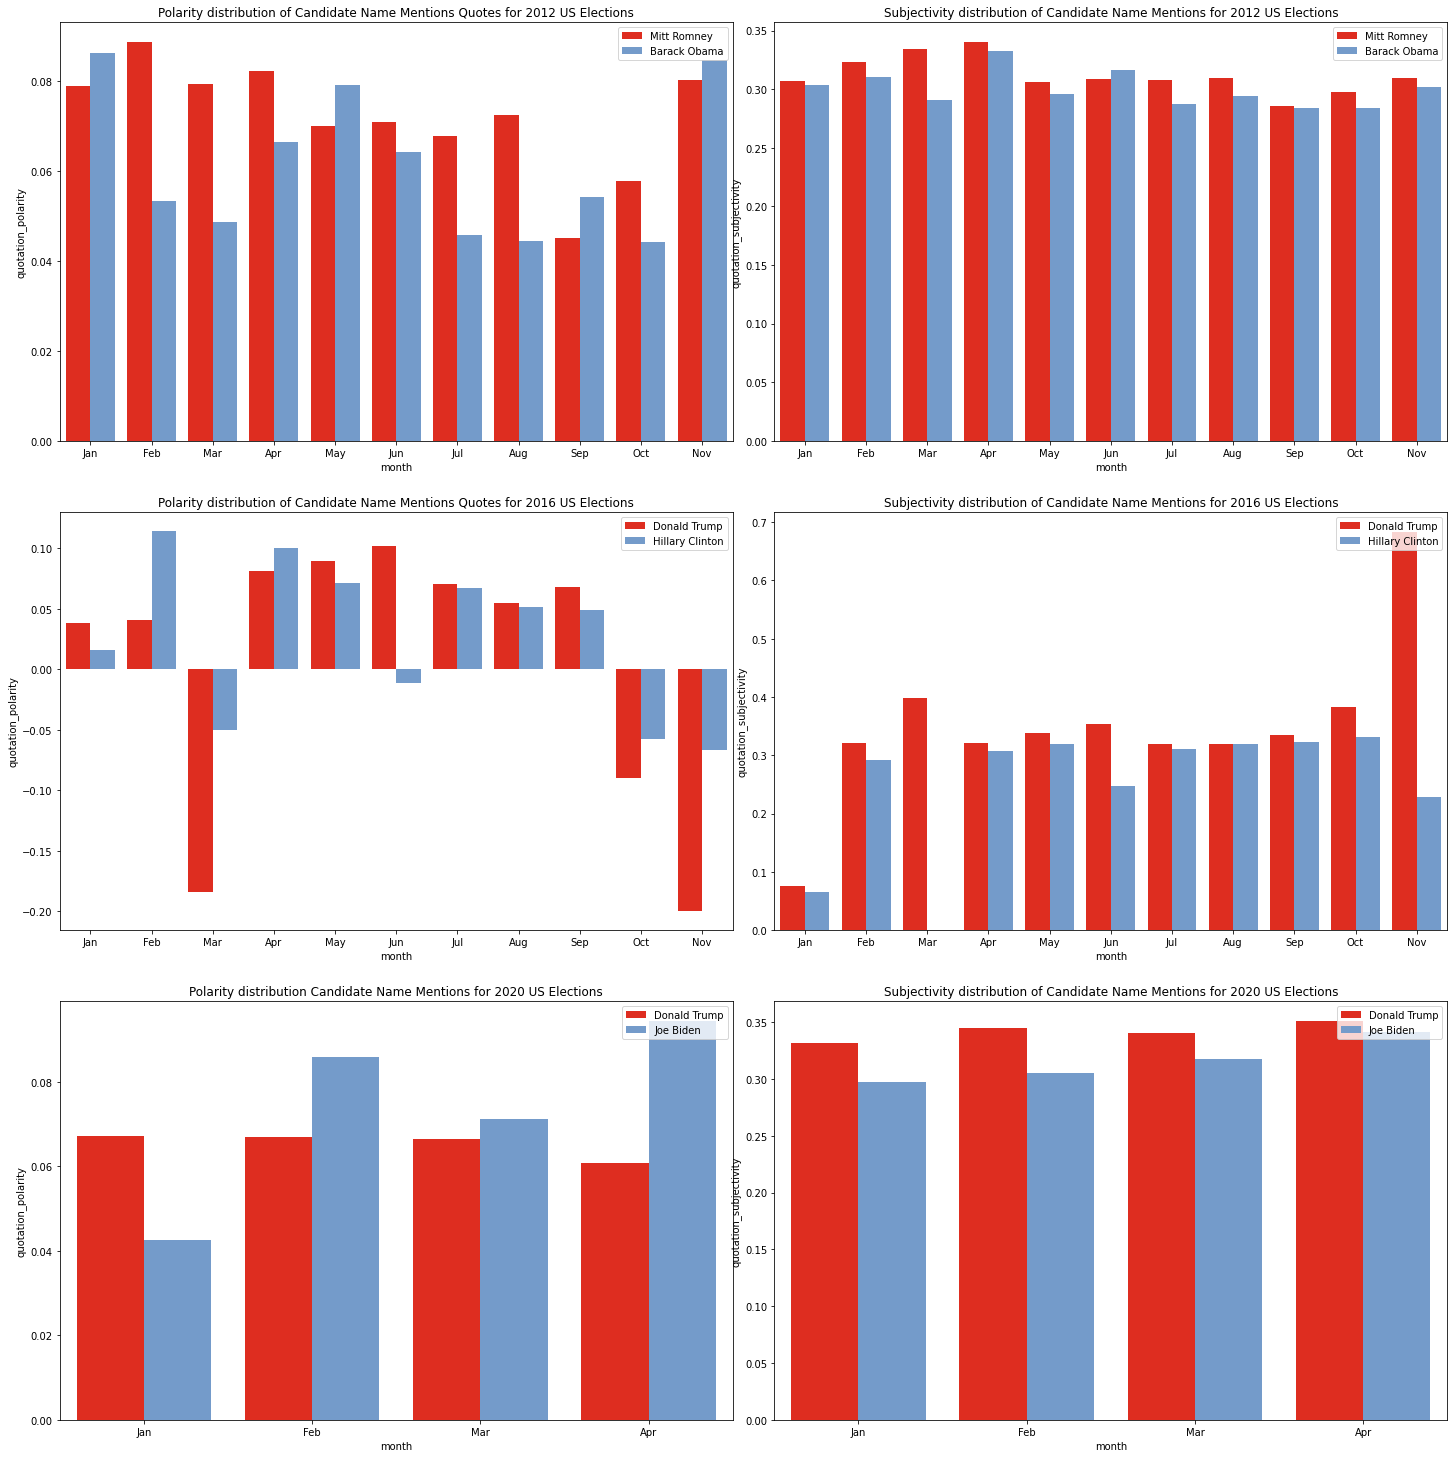

In [36]:
months_2012 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
months_2016 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
months_2020 = ['Jan', 'Feb', 'Mar', 'Apr']
candidates_2012 = ['Mitt Romney', 'Barack Obama']
candidates_2016 = ['Donald Trump', 'Hillary Clinton']
candidates_2020 = ['Donald Trump', 'Joe Biden']

df_candidates_2012 = pd.concat([df_obama_2012_sa, df_romney_2012_sa], ignore_index=True)
df_candidates_2016 = pd.concat([df_trump_2016_sa, df_clinton_2016_sa], ignore_index=True)
df_candidates_2020 = pd.concat([df_trump_2020_sa, df_biden_2020_sa], ignore_index=True)

# The quotes are aggregated and averaged by month and by candidate
df_candidates_2012_polarity_processed = preprocess_data_for_visualisation(df_candidates_2012, months_2012, candidates_2012)
df_candidates_2012_subjectivity_processed = preprocess_data_for_visualisation(df_candidates_2012, months_2012, candidates_2012, subjectivity=True)
df_candidates_2016_polarity_processed = preprocess_data_for_visualisation(df_candidates_2016, months_2016, candidates_2016)
df_candidates_2016_subjectivity_processed = preprocess_data_for_visualisation(df_candidates_2016, months_2016, candidates_2016, subjectivity=True)
df_candidates_2020_polarity_processed = preprocess_data_for_visualisation(df_candidates_2020, months_2020, candidates_2020)
df_candidates_2020_subjectivity_processed = preprocess_data_for_visualisation(df_candidates_2020, months_2020, candidates_2020, subjectivity=True)

fig, axs = plt.subplots(3, 2, figsize=(20,20))
fig.tight_layout(h_pad=5)

axs[0][0].set_title("Polarity distribution of Candidate Name Mentions Quotes for 2012 US Elections")
sns.barplot(x='month', y='quotation_polarity', data=df_candidates_2012_polarity_processed, hue="candidate", order=months_2012, ax=axs[0][0], palette=["#fe1100",'#6699d8'])
axs[0][0].legend(loc='upper right')
axs[1][0].set_title("Polarity distribution of Candidate Name Mentions Quotes for 2016 US Elections")
sns.barplot(x='month', y='quotation_polarity', data=df_candidates_2016_polarity_processed, hue="candidate", order=months_2016, ax=axs[1][0], palette=["#fe1100",'#6699d8'])
axs[1][0].legend(loc='upper right')
axs[2][0].set_title("Polarity distribution Candidate Name Mentions for 2020 US Elections")
sns.barplot(x='month', y='quotation_polarity', data=df_candidates_2020_polarity_processed, hue="candidate", order=months_2020, ax=axs[2][0], palette=["#fe1100",'#6699d8'])
axs[2][0].legend(loc='upper right')

axs[0][1].set_title("Subjectivity distribution of Candidate Name Mentions for 2012 US Elections")
sns.barplot(x='month', y='quotation_subjectivity', data=df_candidates_2012_subjectivity_processed, hue="candidate", order=months_2012, ax=axs[0][1], palette=["#fe1100",'#6699d8'])
axs[0][1].legend(loc='upper right')
axs[1][1].set_title("Subjectivity distribution of Candidate Name Mentions for 2016 US Elections")
sns.barplot(x='month', y='quotation_subjectivity', data=df_candidates_2016_subjectivity_processed, hue="candidate", order=months_2016, ax=axs[1][1], palette=["#fe1100",'#6699d8'])
axs[1][1].legend(loc='upper right')
axs[2][1].set_title("Subjectivity distribution of Candidate Name Mentions for 2020 US Elections")
sns.barplot(x='month', y='quotation_subjectivity', data=df_candidates_2020_subjectivity_processed, hue="candidate", order=months_2020, ax=axs[2][1], palette=["#fe1100",'#6699d8'])
axs[2][1].legend(loc='upper right')

Unfortunately, the change in polarity (y-axis) from a month to another is very small in most cases which makes it difficult conclude a meaningful statistical change. However we observe a very different timeline for 2016 election.

Finally, the quotes from 2020 don't extend past April. 

## Wordcloud of positive and negative quotes (80% threshold)

A simple way to visualise assess the correctness of our sentiment analysis is to plot the word cloud related to the most positive or negatives quotes (>80%).

In [37]:
from collections import Counter
from wordcloud import WordCloud          
import matplotlib.pyplot as plt   

def plot_word_cloud(type_,string: str, filter_keywords=[]):
    for keyword in filter_keywords:
        string = string.replace(keyword, '')

    string_split = Counter(string.split(' '))
    counts = {k:v for k, v in string_split.most_common(200)}

    fig = plt.figure(figsize=(15,15))
    plt.title('word cloud '+type_ ,fontsize=30, pad=25)
    wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue').generate_from_frequencies(counts)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [38]:
def extract_positive_sentiment(df_quotes, threshold=0.5):
    #map [0, 1] to [-1, 1]
    polarity_thresh = threshold * 2 - 1
    polarity_quotes = df_quotes[df_quotes['quotation_polarity'] > polarity_thresh]
    subjective_quotes = df_quotes[df_quotes['quotation_subjectivity'] > threshold]
    return polarity_quotes, subjective_quotes

def extract_negative_sentiment(df_quotes, threshold=0.5):
    #map [0, 1] to [-1, 1]
    polarity_thresh = threshold * 2 - 1
    polarity_quotes = df_quotes[df_quotes['quotation_polarity'] < -polarity_thresh]
    subjective_quotes = df_quotes[df_quotes['quotation_subjectivity'] < threshold]
    return polarity_quotes, subjective_quotes    

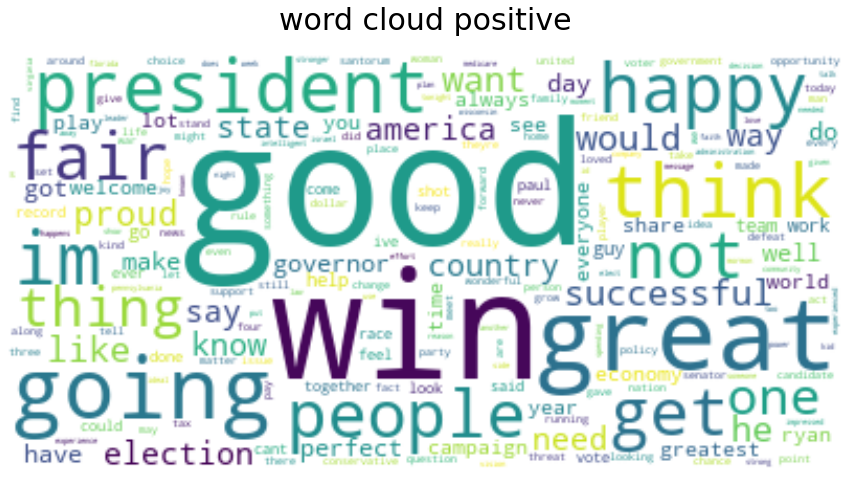

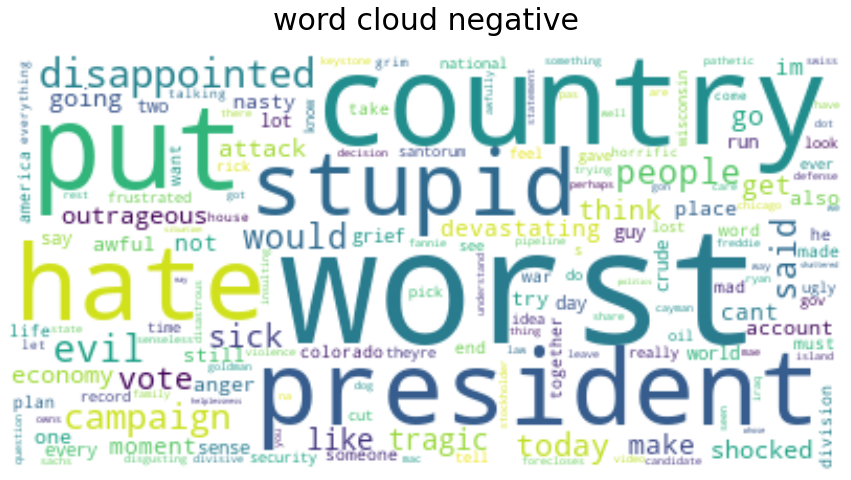

In [39]:
# filter quotes with only good sentiment
positive_pol_quotes, _ = extract_positive_sentiment(df_candidates_2012, threshold=0.8)
negative_pol_quotes, _ = extract_negative_sentiment(df_candidates_2012, threshold=0.8)

positive_long_string = ' '.join(list(' '.join(x) for x in positive_pol_quotes['quotation_lemmatized'].values))
negative_long_string = ' '.join(list(' '.join(x) for x in negative_pol_quotes['quotation_lemmatized'].values))

plot_word_cloud('positive',positive_long_string, filter_keywords=['mitt', 'romney', 'barack', 'obama'])
plot_word_cloud('negative',negative_long_string, filter_keywords=['mitt', 'romney', 'barack', 'obama'])

Our initial baseline sentiment analysis implementation seems to be working properly i.e the most positive/negative quoted words have positive/negative meaning. Furthermore, We need a golden standard to compute the true accuracy.